# Lab 2 - Data Visualization

In [41]:
%matplotlib inline
import pandas as pd
from plotnine import *
from sklearn.linear_model import LinearRegression

## Step 1 - Dataset Explanation

FEV stands for Forced Expiratory Volume. FEV measures the amount of air a person can breath out per second, and is commonly used to understand pulmonary health. This dataset records the FEV for 654 
children ranging in age from 3 to 19. Also recorded is the child's height, sex, and 
if they currently smoke.

This data was originally reported by Tager et. al in the [New England Journal of Medicine](https://www.nejm.org/doi/10.1056/NEJM198309223091204) and the 
[American Journal of Epidemiology](https://academic.oup.com/aje/article-abstract/110/1/15/62256?redirectedFrom=fulltext). It was collated by Rosner in his text on [Fundamentals of Biostatistics](https://www.amazon.com/Fundamentals-Biostatistics-Bernard-Rosner-ebook/dp/B013UXKZDA) and expanded upon by Kahn in the [Journal of Statistics Education](http://jse.amstat.org/v13n2/datasets.kahn.html)
for recomended use in statistics courses.

In [3]:
fev_data = pd.read_csv("data/FEV.csv")

In [65]:
len(fev_data)

654

In [67]:
fev_data["age"].max()

19

In [68]:
fev_data.describe()

,id,age,fev,height
count,654.000000,654.000000,654.000000,654.000000
mean,37169.571865,9.931193,2.636780,61.143578
std,23690.860350,2.953935,0.867059,5.703513
min,201.000000,3.000000,0.791000,46.000000
25%,15811.000000,8.000000,1.981000,57.000000
50%,36071.000000,10.000000,2.547500,61.500000
75%,53638.500000,12.000000,3.118500,65.500000
max,90001.000000,19.000000,5.793000,74.000000


In [4]:
fev_data[:10]

,id,age,fev,height,sex,smoke
0,301,9,1.708,57.0,female,non-current smoker
1,451,8,1.724,67.5,female,non-current smoker
2,501,7,1.720,54.5,female,non-current smoker
3,642,9,1.558,53.0,male,non-current smoker
4,901,9,1.895,57.0,male,non-current smoker
5,1701,8,2.336,61.0,female,non-current smoker
6,1752,6,1.919,58.0,female,non-current smoker
7,1753,6,1.415,56.0,female,non-current smoker
8,1901,8,1.987,58.5,female,non-current smoker
9,1951,9,1.942,60.0,female,non-current smoker


## Step 2 - Data Analysis

### 2.1 FEV and sex

First, can we detect a difference in FEV based on reported sex. The dataset is close to equally split between male and female. A box plot and histogram can be used to show the distribution of the FEV across sex.

In [91]:
male_fev_data = fev_data[fev_data["sex"] == "male"]
len(male_fev_data)

336

In [92]:
female_fev_data = fev_data[fev_data["sex"] == "female"]
len(female_fev_data)

318

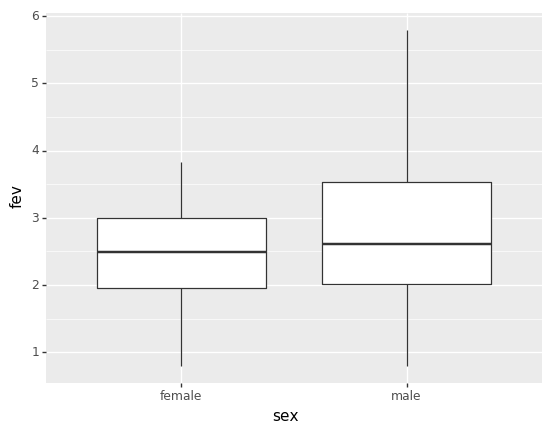

<ggplot: (7543222565)>

In [9]:
ggplot(fev_data, aes(x="sex", y="fev")) \
+ geom_boxplot()

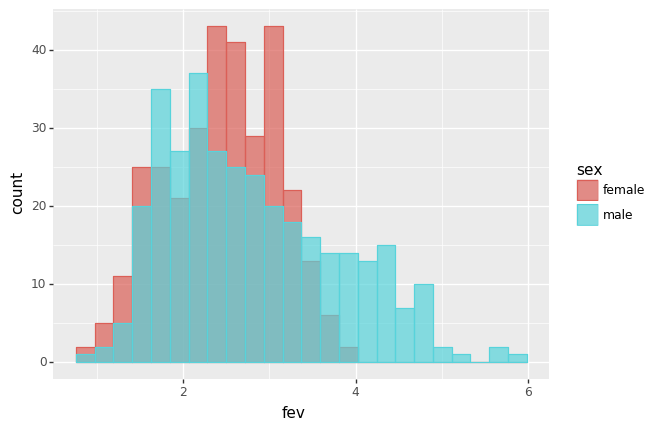

<ggplot: (7544036829)>

In [90]:
ggplot(fev_data, aes(x="fev", fill="sex", color="sex")) \
+ geom_histogram(bins=24, position="identity", alpha=0.7)

The means appear very similar, however the distributions are quite different, which can be shown with a two-sided independent t-test. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind

In [98]:
from scipy.stats import ttest_ind
ttest_ind(male_fev_data["fev"], female_fev_data["fev"])

Ttest_indResult(statistic=5.441214544130708, pvalue=7.495753953787706e-08)

### 2.2 FEV and smoking

Next, let's see if we can also see the same difference between smokers and non-smokers. There are many more non-smokers than smokers in the dataset. Boxplots and histograms can again show the differences in the distributions.

In [94]:
smoke_fev_data = fev_data[fev_data["smoke"] == "current smoker"]
len(smoke_fev_data)

65

In [95]:
nosmoke_fev_data = fev_data[fev_data["smoke"] == "non-current smoker"]
len(nosmoke_fev_data)

589

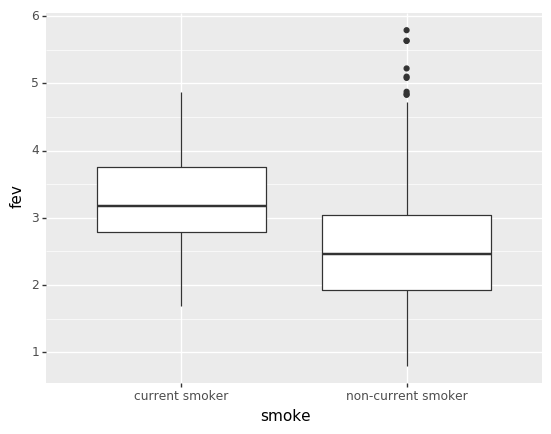

<ggplot: (7542603393)>

In [7]:
ggplot(fev_data, aes(x="smoke", y="fev")) \
+ geom_boxplot()

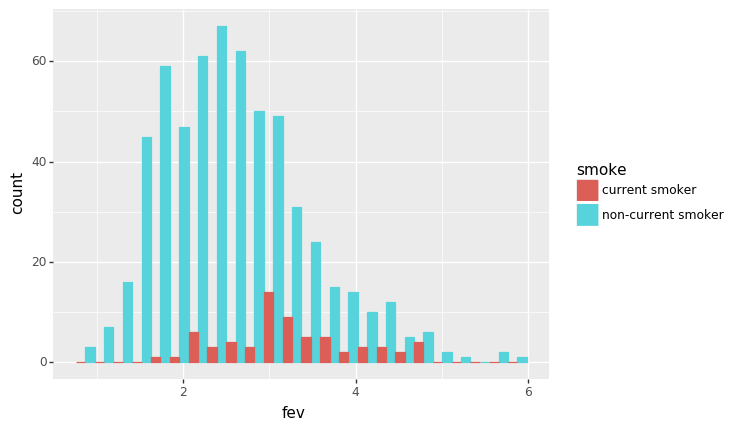

<ggplot: (7543533309)>

In [100]:
ggplot(fev_data, aes(x="fev", fill="smoke", color="smoke")) \
+ geom_histogram(bins=24, position="dodge")

This difference is more pronounced, also confirmed by another independent two-sided t-test.

In [96]:
from scipy.stats import ttest_ind
ttest_ind(smoke_fev_data["fev"], nosmoke_fev_data["fev"])

Ttest_indResult(statistic=6.464453172596537, pvalue=1.9928459182933092e-10)

## 2.3 Relationships between variables

Since sex and smoking/non-smoking are categorial variables, let's look at the age and height of our subjects to test out our tools for finding relationships between variables. 

We first draw a scatter plot of age versus height, adding in some jitter on the x axis since age is an integer. By dividing the plot by sex as the color, we can create two linear regression lines, one for male and one for female.

/Users/goadrich/anaconda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


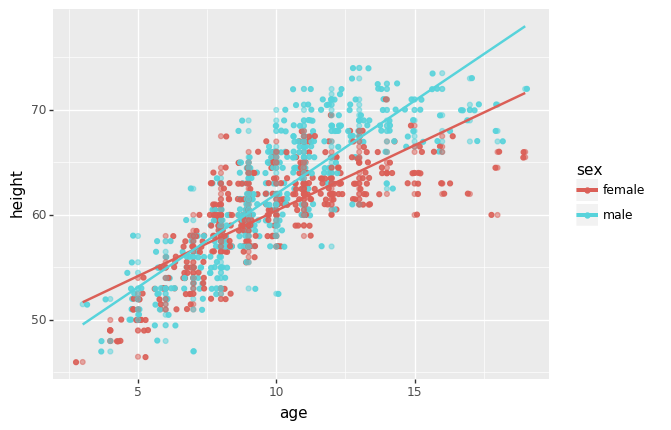

<ggplot: (7543471337)>

In [40]:
ggplot(fev_data, aes(x="age", y="height", color="sex")) \
+ geom_jitter(alpha=0.9) \
+ geom_point(alpha=0.5) + geom_smooth(se=False, method="lm")

Height appears to taper off as age grows (as we expect). The standard smoothing model is called Locally Weighted Linear Regression. This will merge together local linear regression models for a closer fit.

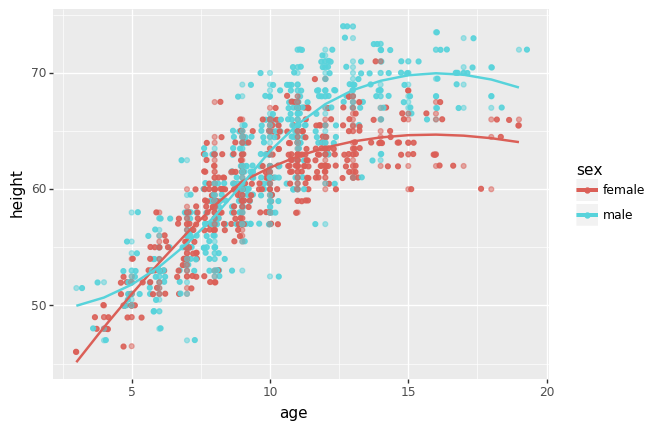

<ggplot: (7543995317)>

In [101]:
ggplot(fev_data, aes(x="age", y="height", color="sex")) \
+ geom_jitter(alpha=0.9) \
+ geom_point(alpha=0.5) + geom_smooth(se=False)

With these tools, let's look at how height, age, and smoking are related to FEV. First up is height. Shown below are the regression lines for height and FEV, separated by smoking status. Here we turn on the confidence intervals, which highlight the small sample size of smokers in our dataset. For height, there is not much difference between the smokers and non-smokers.

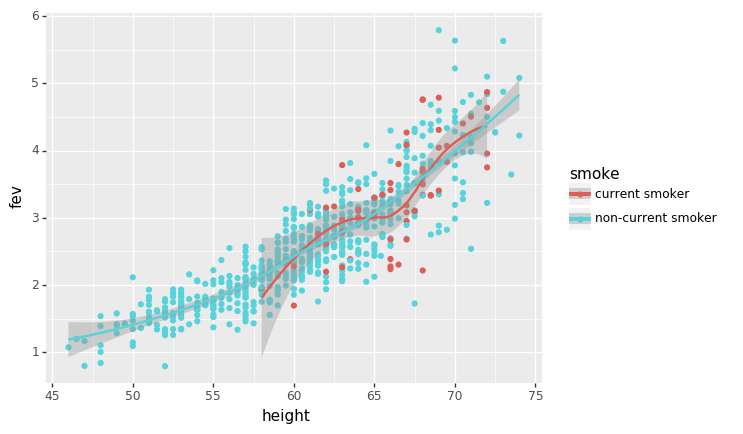

<ggplot: (7543996925)>

In [102]:
ggplot(fev_data, aes(x="height", y="fev", color="smoke")) \
+ geom_point() + geom_smooth()

However, when we move to age, we can see a marked difference in the two models learned for smokers and non-smokers.

/Users/goadrich/anaconda/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


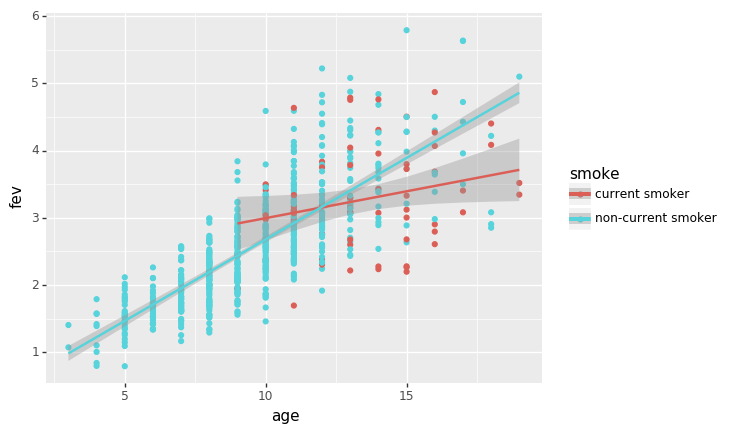

<ggplot: (7543996873)>

In [103]:
ggplot(fev_data, aes(x="age", y="fev", color="smoke")) \
+ geom_point() + geom_smooth(method="lm")

Let's explore that difference further. Here we calculate the the two linear regression lines, and the $R^2$ value. $R^2$ varies from 0 to 1 and when value is close to 1, it means the line is a very close fit to the data. With little data and quite a spread, the smoker data is not very strongly correlated with the line. However, there is a much stronger correlation with the non-smokers.

In [79]:
X = fev_data[fev_data["smoke"] == "current smoker"]["age"].values.reshape(-1, 1)
Y = fev_data[fev_data["smoke"] == "current smoker"]["fev"]

reg = LinearRegression().fit(X, Y)

print(f"Regression line is {reg.coef_[0]:.3}x + {reg.intercept_:.3}")
print(f"R squared = {reg.score(X, Y):.3}")


Regression line is 0.0799x + 2.2
R squared = 0.062


In [81]:
X = fev_data[fev_data["smoke"] == "non-current smoker"]["age"].values.reshape(-1, 1)
Y = fev_data[fev_data["smoke"] == "non-current smoker"]["fev"]

reg = LinearRegression().fit(X, Y)

print(f"Regression line is {reg.coef_[0]:.3}x + {reg.intercept_:.3}")
print(f"R squared = {reg.score(X, Y):.3}")


Regression line is 0.243x + 0.253
R squared = 0.611


# Step 3

This dataset let us explore the relationships between age, height, gender, smoking and FEV. We find an expected gender difference in relation to age and height, but when we move to FEV, the smoking data is much more muddled. More data on smokers in the future can help us have stronger data correlations.